In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
data = pd.read_excel('hospital_readmission.xlsx')

In [3]:
# Convert 'readmitted' to binary
data['readmitted'] = data['readmitted'].apply(lambda x: 1 if x == 'Yes' else 0)

In [4]:
# Encode categorical variables
categorical_cols = ['gender', 'diag_1', 'diag_2', 'A1Cresult', 'insulin', 'change', 'diabetesMed']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

In [5]:
# Select features and target
features = ['age', 'gender', 'num_procedures', 'num_medications', 'time_in_hospital', 
            'number_outpatient', 'number_emergency', 'number_inpatient', 
            'diag_1', 'diag_2', 'A1Cresult', 'insulin', 'change', 'diabetesMed']
X = data[features]
y = data['readmitted']

In [6]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [7]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'num_procedures', 'num_medications', 'time_in_hospital', 
                  'number_outpatient', 'number_emergency', 'number_inpatient']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [8]:
# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [9]:
# Train Decision Tree
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

In [10]:
# Evaluate Logistic Regression
print("=== Logistic Regression Performance ===")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

=== Logistic Regression Performance ===
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       212
           1       0.00      0.00      0.00        88

    accuracy                           0.71       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.50      0.71      0.59       300

Accuracy: 0.7066666666666667
Confusion Matrix:
 [[212   0]
 [ 88   0]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [11]:
# Evaluate Decision Tree
print("\n=== Decision Tree Performance ===")
print(classification_report(y_test, y_pred_dtree))
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))



=== Decision Tree Performance ===
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       212
           1       0.27      0.08      0.12        88

    accuracy                           0.67       300
   macro avg       0.49      0.49      0.46       300
weighted avg       0.58      0.67      0.60       300

Accuracy: 0.6666666666666666
Confusion Matrix:
 [[193  19]
 [ 81   7]]


In [12]:
# Logistic Regression Feature Importance
logreg_coef = pd.DataFrame({
    'feature': features,
    'coefficient': logreg.coef_[0]
}).sort_values(by='coefficient', ascending=False)

# Decision Tree Feature Importance
dtree_importance = pd.DataFrame({
    'feature': features,
    'importance': dtree.feature_importances_
}).sort_values(by='importance', ascending=False)

In [13]:
# Print feature importances
print("\n=== Logistic Regression Feature Importance ===")
print(logreg_coef)

print("\n=== Decision Tree Feature Importance ===")
print(dtree_importance)

# Plot feature importances
plt.figure(figsize=(14, 6))


=== Logistic Regression Feature Importance ===
              feature  coefficient
8              diag_1     0.160488
2      num_procedures     0.118748
6    number_emergency     0.076881
1              gender     0.046837
11            insulin     0.029209
3     num_medications    -0.005937
4    time_in_hospital    -0.008662
10          A1Cresult    -0.027852
7    number_inpatient    -0.031915
13        diabetesMed    -0.034499
9              diag_2    -0.035754
12             change    -0.102874
0                 age    -0.107212
5   number_outpatient    -0.118521

=== Decision Tree Feature Importance ===
              feature  importance
0                 age    0.371176
3     num_medications    0.195382
10          A1Cresult    0.129028
4    time_in_hospital    0.125961
5   number_outpatient    0.080440
13        diabetesMed    0.043096
2      num_procedures    0.035304
6    number_emergency    0.019613
1              gender    0.000000
7    number_inpatient    0.000000
8          

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

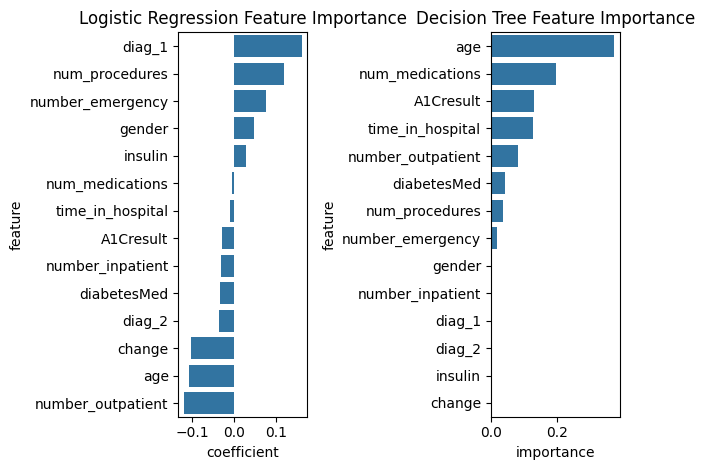

In [14]:
plt.subplot(1, 2, 1)
sns.barplot(x='coefficient', y='feature', data=logreg_coef)
plt.title('Logistic Regression Feature Importance')

plt.subplot(1, 2, 2)
sns.barplot(x='importance', y='feature', data=dtree_importance)
plt.title('Decision Tree Feature Importance')

plt.tight_layout()
plt.show()